In [ ]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"


In [ ]:
table = 'expert_match'
schema = 'score'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [ ]:
df

,gbifID,data_qualiy_score
0,4171987115,0.35
1,5759678836,0.80
2,5167857843,0.80
3,4901298379,0.50
4,4891980652,0.80
...,...,...
39749,5237782158,0.50
39750,4994136317,0.50
39751,4952994322,0.50
39752,3994333511,0.20


<Axes: xlabel='data_qualiy_score', ylabel='Count'>

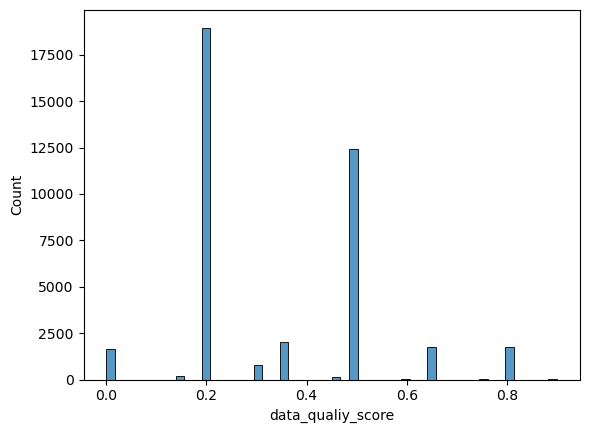

In [ ]:
sns.histplot(df, x ='data_qualiy_score')